In [1]:
import csv
import sys
import pandas as pd

csv.field_size_limit(sys.maxsize)

131072

In [80]:
from datetime import datetime

def make_date (myDate):
    year = myDate.split("-")
    if int(year[0]) < 2261:
        dt = datetime.strptime(myDate, "%Y-%m-%d 00:00:00")
        return dt
    else:
        print("year too big for Pandas", year[0])
        raise ValueError('Invalid date')


In [70]:
offender_database = []
first_row = 0
myRange = [11,12]

with open('Offender.csv', newline='') as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
            
        else:
            if len(row) > 16:
                row[13] = row[13] + row[14] + row[15]
                row[14] = row[16]
                row.pop() # remove from row array
                row.pop() # remove from row array
            elif len(row) > 15:
                row[13] = row[13] + row[14]
                row[14] = row[15]
                row.pop() # remove from row array
            try:
                for i in myRange:
                    row[i] = make_date(row[i])
            except:
                continue
            offender_database.append(row)

offenderDS = pd.DataFrame(data=offender_database, columns=first_row)
offenderDS['ReceptionDate'] = pd.to_datetime(offenderDS['ReceptionDate'])
offenderDS.ReceptionDate=offenderDS.ReceptionDate.dt.strftime('%Y')

['DocNum', 'LastName', 'FirstName', 'MiddleInit', 'Suffix', 'Race', 'Gender', 'HairColor', 'EyeColor', 'Height', 'Weight', 'DOB', 'ReceptionDate', 'CurrentFacility', 'Status']


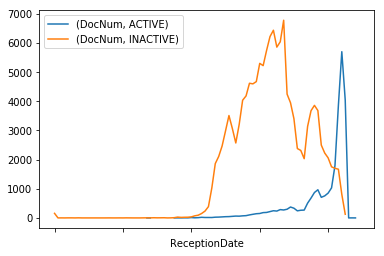

In [71]:
#pt = pd.pivot_table(offenderDS, values=["DocNum"], index=["Status"], aggfunc='count', columns=['ReceptionDate'])
pt = pd.pivot_table(offenderDS, values=["DocNum"], index=["ReceptionDate"], aggfunc="count", columns=["Status"])
pt.plot(kind="line",).legend()

In [72]:
#before you open these files, remove the errant quote on line 191780

alias_database = []
first_row = 0 

with open('OffenderAlias.csv', encoding = "ISO-8859-1") as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            if row[2] == "":
                continue # skip lines with no last name
            if len(row) > 7:
                print(row)
                continue # skip these lines or you can edit by hand
            try:
                row[6] = make_date(row[6])
            except:
                continue
            alias_database.append(row)

aliasDS = pd.DataFrame(data=alias_database, columns=first_row)
aliasDS['DOB'] = pd.to_datetime(aliasDS['DOB'])
aliasDS.DOB=aliasDS.DOB.dt.strftime('%Y')

['Id', 'DOCNum', 'LastName', 'FirstName', 'MiddleInit', 'Suffix', 'DOB']
['695541', '188288', 'Conner', 'v', 'George', 'F', '', '1970-11-09 00:00:00']
['714115', '232759', 'Ramirez', '', 'Julian', 'R', '', '1961-01-09 00:00:00']
['761729', '451319', 'Patron', '', 'Filameno', '', '', '1971-07-05 00:00:00']
['774815', '516258', 'Hunter', '', 'Anthony', '', '', '1976-11-11 00:00:00']
['795825', '632218', 'Thorpe', '', 'James', 'O', '', '1972-04-07 00:00:00']
['796891', '638210', 'Byrum', '', 'Terry', '', '', '1983-12-09 00:00:00']
['805044', '683470', 'Aleman', ' Carlos', 'Aberto', '', '', '1983-04-22 00:00:00']
['831749', '583692', 'Jefferson', ' Jr.', 'Randy', 'L', '', '1980-04-23 00:00:00']


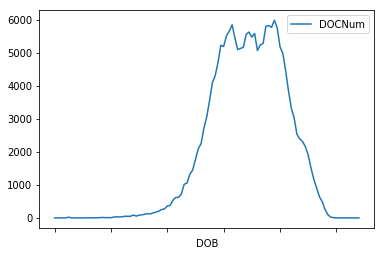

In [73]:
pt = pd.pivot_table(aliasDS, values=["DOCNum"], index=["DOB"], aggfunc="count")
pt.plot(kind="line",).legend()

In [76]:
exit_database = []
first_row = 0

with open('OffenderExit.csv') as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            if len(row) > 3:
                row[2] = row[2] + row[3]
                row.pop()
            elif len(row) > 4:
                print(row)
            exit_database.append(row)

exitDS = pd.DataFrame(data=exit_database, columns=first_row)
exitDS['ExitDate'] = pd.to_datetime(exitDS['ExitDate'])
exitDS.ExitDate=exitDS.ExitDate.dt.strftime('%Y')

['DOCNum', 'ExitDate', 'ExitReason']


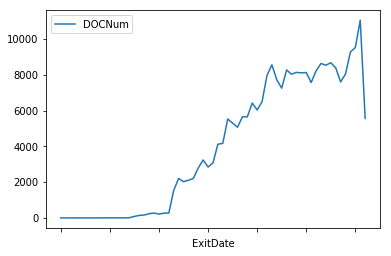

In [77]:
pt = pd.pivot_table(exitDS, values=["DOCNum"], index=["ExitDate"], aggfunc="count")
pt.plot(kind="line",).legend()

In [78]:
reception_database = []
first_row = 0

with open('OffenderReception.csv') as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            if len(row) > 5:
                row[2] = row[2] + row[3] + row[4]
                row[3] = row[5]
                row.pop()
                row.pop()
            elif len(row) > 4:
                row[2] = row[2] + row[3]
                row[3] = row[4]
                row.pop()
            reception_database.append(row)

recepDS = pd.DataFrame(data=reception_database, columns=first_row)
recepDS['MovementDate'] = pd.to_datetime(recepDS['MovementDate'])
recepDS.MovementDate=recepDS.MovementDate.dt.strftime('%Y')

['DocNum', 'MovementDate', 'Reason', 'Facility']


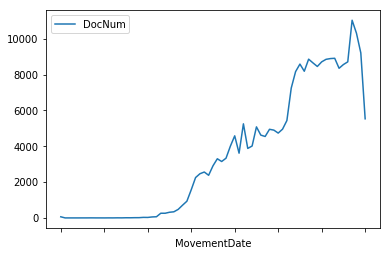

In [79]:
pt = pd.pivot_table(recepDS, values=["DocNum"], index=["MovementDate"], aggfunc="count")
pt.plot(kind="line",).legend()

In [81]:
sentence_database = []
first_row = 0
myRange = [5, 15, 16]

with open('OffenderSentence.csv', encoding = "ISO-8859-1") as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            try:
                for i in myRange:
                    #print(i, row[i])
                    row[i] = make_date(row[i])
            except:
                continue
            sentence_database.append(row)

['Id', 'DOCNum', 'OrderID', 'ChargeSeq', 'CRFNum', 'ConvictDate', 'Court', 'StatuteCode', 'OffenceDescription', 'OffenceComment', 'SentenceTermCode', 'Years', 'Months', 'Days', 'SentenceTerm', 'StartDate', 'EndDate', 'CountNum', 'OrderCode', 'ConsecutiveToCount', 'ChargeStatus']
year too big for Pandas 2272
year too big for Pandas 2984
year too big for Pandas 2890
year too big for Pandas 3004
year too big for Pandas 2861
year too big for Pandas 2986
year too big for Pandas 2381
year too big for Pandas 2530
year too big for Pandas 2430
year too big for Pandas 2680
year too big for Pandas 2992
year too big for Pandas 3006
year too big for Pandas 2973
year too big for Pandas 2972
year too big for Pandas 2996
year too big for Pandas 2996
year too big for Pandas 2981
year too big for Pandas 2341
year too big for Pandas 2341
year too big for Pandas 2491
year too big for Pandas 2611
year too big for Pandas 2761
year too big for Pandas 2801
year too big for Pandas 2841
year too big for Pandas 

year too big for Pandas 3040
year too big for Pandas 9999
year too big for Pandas 3009
year too big for Pandas 3120
year too big for Pandas 3120
year too big for Pandas 2991
year too big for Pandas 2290
year too big for Pandas 2290
year too big for Pandas 2295
year too big for Pandas 2320
year too big for Pandas 2330
year too big for Pandas 2400
year too big for Pandas 2350
year too big for Pandas 2400
year too big for Pandas 2355
year too big for Pandas 2410
year too big for Pandas 2365
year too big for Pandas 2430
year too big for Pandas 2385
year too big for Pandas 2430
year too big for Pandas 2395
year too big for Pandas 2440
year too big for Pandas 2405
year too big for Pandas 2450
year too big for Pandas 2425
year too big for Pandas 2470
year too big for Pandas 2445
year too big for Pandas 2490
year too big for Pandas 2465
year too big for Pandas 2510
year too big for Pandas 2475
year too big for Pandas 2530
year too big for Pandas 2495
year too big for Pandas 2545
year too big f

year too big for Pandas 2376
year too big for Pandas 2376
year too big for Pandas 2396
year too big for Pandas 2376
year too big for Pandas 2550
year too big for Pandas 3056
year too big for Pandas 3030
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3040
year too big for Pandas 3023
year too big for Pandas 3096
year too big for Pandas 3096
year too big for Pandas 3096
year too big for Pandas 3096
year too big for Pandas 3096
year too big for Pandas 3038
year too big for Pandas 3040
year too big for Pandas 3101
year too big for Pandas 3101
year too big for Pandas 3111
year too big for Pandas 3098
year too big for Pandas 2282
year too big for Pandas 2282
year too big for Pandas 2312
year too big for Pandas 2327
year too big for Pandas 2342
year too big f

year too big for Pandas 3056
year too big for Pandas 2543
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3054
year too big for Pandas 3039
year too big for Pandas 3039
year too big for Pandas 3054
year too big for Pandas 2277
year too big for Pandas 3127
year too big for Pandas 3122
year too big for Pandas 3122
year too big for Pandas 3132
year too big for Pandas 3132
year too big for Pandas 3132
year too big for Pandas 3127
year too big for Pandas 3027
year too big for Pandas 3027
year too big for Pandas 3052
year too big for Pandas 3052
year too big for Pandas 3072
year too big for Pandas 3122
year too big for Pandas 2992
year too big for Pandas 2325
year too big for Pandas 2262
year too big for Pandas 3015
year too big for Pandas 3025
year too big for Pandas 3045
year too big f

year too big for Pandas 2302
year too big for Pandas 2656
year too big for Pandas 2683
year too big for Pandas 2656
year too big for Pandas 2266
year too big for Pandas 2265
year too big for Pandas 2266
year too big for Pandas 2266
year too big for Pandas 2286
year too big for Pandas 2261
year too big for Pandas 2261
year too big for Pandas 2411
year too big for Pandas 2336
year too big for Pandas 2486
year too big for Pandas 2464
year too big for Pandas 2464
year too big for Pandas 2264
year too big for Pandas 2276
year too big for Pandas 2264
year too big for Pandas 2272
year too big for Pandas 2276
year too big for Pandas 2282
year too big for Pandas 2316
year too big for Pandas 2368
year too big for Pandas 2368
year too big for Pandas 2568
year too big for Pandas 2968
year too big for Pandas 2768
year too big for Pandas 3168
year too big for Pandas 2332
year too big for Pandas 2332
year too big for Pandas 2332
year too big for Pandas 2352
year too big for Pandas 2372
year too big f

In [68]:
sentenceDS = pd.DataFrame(data=sentence_database, columns=first_row)
sentenceDS['ConvictDate'] = pd.to_datetime(sentenceDS['ConvictDate'])
sentenceDS['StartDate'] = pd.to_datetime(sentenceDS['StartDate'])
sentenceDS['EndDate'] = pd.to_datetime(sentenceDS['EndDate'])
sentenceDS.ConvictDate=sentenceDS.ConvictDate.dt.strftime('%Y')

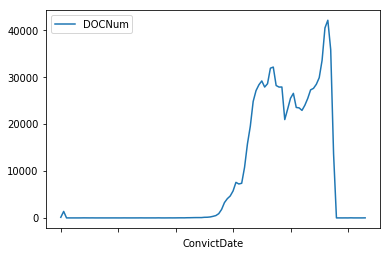

In [69]:
pt = pd.pivot_table(sentenceDS, values=["DOCNum"], index=["ConvictDate"], aggfunc="count")
pt.plot(kind="line",).legend()